In [1]:
# Install, import libraries
import sys
!{sys.executable} -m pip install landsatxplore python-dotenv pandas pydap geopandas

import geopandas as gpd
import pandas as pd

  Using cached landsatxplore-0.6-py3-none-any.whl (10 kB)


In [2]:
# import secrets from .env file
%load_ext dotenv
%dotenv
from os import environ

# set up landsat API
import landsatxplore.api
import landsatxplore.earthexplorer

ls_api = landsatxplore.api.API(environ.get("LANDSAT_USER"), environ.get("LANDSAT_PASS"))
ee_api = landsatxplore.earthexplorer.EarthExplorer(environ.get("LANDSAT_USER"), environ.get("LANDSAT_PASS"))

In [3]:
# Search landsat for specific scenes
scenes = ls_api.search(
    dataset='LANDSAT_8_C1',
    latitude=35.9210234, longitude=-79.0743103, # Chapel Hill, NC
    start_date='2018-01-01', end_date='2019-01-01',
    max_cloud_cover=10)

print('{} dates found.'.format(len(scenes)))

df = pd.DataFrame(scenes)

df

10 dates found.


,acquisitionDate,startTime,endTime,spatialFootprint,sceneBounds,browseUrl,dataAccessUrl,downloadUrl,entityId,displayId,cloudCover,metadataUrl,fgdcMetadataUrl,modifiedDate,orderUrl,bulkOrdered,ordered,summary
0,2018-01-04,2018-01-04,2018-01-04,"{'type': 'Polygon', 'coordinates': [[[-80.5567...","-80.55678,34.97823,-77.99666,37.09385",https://ims.cr.usgs.gov/browse/landsat_8_c1/20...,https://earthexplorer.usgs.gov/order/process?d...,https://earthexplorer.usgs.gov/download/extern...,LC80160352018004LGN00,LC08_L1TP_016035_20180104_20180118_01_T1,4.63,https://earthexplorer.usgs.gov/metadata/xml/12...,https://earthexplorer.usgs.gov/fgdc/12864/LC80...,2018-01-18T15:39:18,https://earthexplorer.usgs.gov/order/process?d...,False,False,Entity ID: LC08_L1TP_016035_20180104_20180118_...
1,2018-01-20,2018-01-20,2018-01-20,"{'type': 'Polygon', 'coordinates': [[[-80.5441...","-80.54414,34.97855,-77.98429,37.09411",https://ims.cr.usgs.gov/browse/landsat_8_c1/20...,https://earthexplorer.usgs.gov/order/process?d...,https://earthexplorer.usgs.gov/download/extern...,LC80160352018020LGN00,LC08_L1TP_016035_20180120_20180206_01_T1,5.15,https://earthexplorer.usgs.gov/metadata/xml/12...,https://earthexplorer.usgs.gov/fgdc/12864/LC80...,2018-02-06T03:02:25,https://earthexplorer.usgs.gov/order/process?d...,False,False,Entity ID: LC08_L1TP_016035_20180120_20180206_...
2,2018-02-05,2018-02-05,2018-02-05,"{'type': 'Polygon', 'coordinates': [[[-80.5320...","-80.53208,34.97824,-77.97229,37.09369",https://ims.cr.usgs.gov/browse/landsat_8_c1/20...,https://earthexplorer.usgs.gov/order/process?d...,https://earthexplorer.usgs.gov/download/extern...,LC80160352018036LGN00,LC08_L1TP_016035_20180205_20180221_01_T1,1.11,https://earthexplorer.usgs.gov/metadata/xml/12...,https://earthexplorer.usgs.gov/fgdc/12864/LC80...,2018-02-20T18:47:11,https://earthexplorer.usgs.gov/order/process?d...,False,False,Entity ID: LC08_L1TP_016035_20180205_20180221_...
3,2018-03-09,2018-03-09,2018-03-09,"{'type': 'Polygon', 'coordinates': [[[-80.5357...","-80.53573,34.97873,-77.97601,37.09398",https://ims.cr.usgs.gov/browse/landsat_8_c1/20...,https://earthexplorer.usgs.gov/order/process?d...,https://earthexplorer.usgs.gov/download/extern...,LC80160352018068LGN00,LC08_L1TP_016035_20180309_20180320_01_T1,0.36,https://earthexplorer.usgs.gov/metadata/xml/12...,https://earthexplorer.usgs.gov/fgdc/12864/LC80...,2018-03-20T01:02:45,https://earthexplorer.usgs.gov/order/process?d...,False,False,Entity ID: LC08_L1TP_016035_20180309_20180320_...
4,2018-05-12,2018-05-12,2018-05-12,"{'type': 'Polygon', 'coordinates': [[[-80.5675...","-80.56756,34.97867,-78.00841,37.09375",https://ims.cr.usgs.gov/browse/landsat_8_c1/20...,https://earthexplorer.usgs.gov/order/process?d...,https://earthexplorer.usgs.gov/download/extern...,LC80160352018132LGN00,LC08_L1TP_016035_20180512_20180517_01_T1,0.20,https://earthexplorer.usgs.gov/metadata/xml/12...,https://earthexplorer.usgs.gov/fgdc/12864/LC80...,2018-05-17T08:04:15,https://earthexplorer.usgs.gov/order/process?d...,False,False,Entity ID: LC08_L1TP_016035_20180512_20180517_...
5,2018-08-16,2018-08-16,2018-08-16,"{'type': 'Polygon', 'coordinates': [[[-80.5227...","-80.52273,34.9778,-77.9619,37.09406",https://ims.cr.usgs.gov/browse/landsat_8_c1/20...,https://earthexplorer.usgs.gov/order/process?d...,https://earthexplorer.usgs.gov/download/extern...,LC80160352018228LGN00,LC08_L1TP_016035_20180816_20180829_01_T1,4.25,https://earthexplorer.usgs.gov/metadata/xml/12...,https://earthexplorer.usgs.gov/fgdc/12864/LC80...,2018-08-28T20:52:08,https://earthexplorer.usgs.gov/order/process?d...,False,False,Entity ID: LC08_L1TP_016035_20180816_20180829_...
6,2018-10-03,2018-10-03,2018-10-03,"{'type': 'Polygon', 'coordinates': [[[-80.5322...","-80.53224,34.97793,-77.97125,37.09405",https://ims.cr.usgs.gov/browse/landsat_8_c1/20...,https://earthexplorer.usgs.gov/order/process?d...,https://earthexplorer.usgs.gov/download/extern...,LC80160352018276LGN00,LC08_L1TP_016035_20181003_2018101

In [7]:
# Download one landsat image
outfile = ee_api.download(scene_id='LC80160352018356LGN00', output_dir='./landsat')
!tar -xzf {outfile}

860MB [10:20, 1.45MB/s]                               


tar: ./landsat: Not found in archive
tar: Exiting with failure status due to previous errors


In [11]:
!tar -xzf {outfile}

In [11]:
# Download OCO-2 C02 data
from pydap.client import open_url
from pydap.cas.urs import setup_session
dataset_url = "https://oco2.gesdisc.eosdis.nasa.gov:443/opendap/OCO2_L2_Lite_FP.9r/2020/oco2_LtCO2_200121_B9003r_200204193452s.nc4"
session = setup_session(environ.get("EARTHDATA_USER"), environ.get("EARTHDATA_PASS"), check_url=dataset_url)
dataset = open_url(dataset_url, session=session)

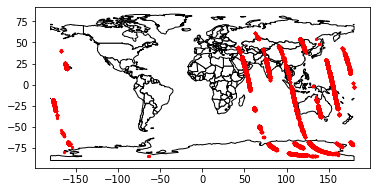

In [23]:
data = list(zip(dataset['latitude'], dataset['longitude'], dataset['xco2'], dataset['time'], dataset['vertex_latitude'], dataset['vertex_longitude']))
df = pd.DataFrame(data, columns=['latitude', 'longitude', 'xco2', 'time', 'vertex_latitude', 'vertex_longitude'])
gdf = gpd.GeoDataFrame(df['xco2'], geometry=gpd.points_from_xy(df.longitude, df.latitude))

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

base = world.plot(color='white', edgecolor='black')
gdf.plot(ax=base, marker='o', color='red', markersize=5);

In [18]:
df = pd.DataFrame(data, columns=['latitude', 'longitude', 'xco2'])
df

,latitude,longitude,xco2
0,-73.451141,60.774773,0.000397
1,-73.459030,60.805878,0.000403
2,-73.467072,60.836891,0.000408
3,-73.500046,60.958488,0.000397
4,-73.468445,60.738075,0.000406
...,...,...,...
7173,59.029034,-115.288528,0.000393
7174,59.023499,-115.272263,0.000396
7175,59.012077,-115.240181,0.000394
7176,59.025597,-115.236656,0.000396
